In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

fontsize = 24
fig_width_pt = 700.0
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size = [fig_width, fig_height]
params = {'backend': 'ps',
          'font.serif':  'cm',
          'font.sans-serif': 'arial',
          'axes.labelsize': fontsize,
          'font.size': fontsize,
          'axes.titlesize': fontsize,
          'legend.fontsize': fontsize-2,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'lines.linewidth': 3}
plt.rcParams.update(params)

In [52]:
# Units: s/byte
T_copy = 1/(12600.2*1024*1024)

# Function that takes the number of points as argument and returns the time it takes to send AND recv that many
def T_MPI_sendrecv(x):
    if x < 500:
        return (-0.00004615302*x+12.1250764)/1000
    else:
        return (0.000002394175*x-0.01176775)/1000

In [53]:
# L, R, T, B
halo = [1,1,1,1]

# latency (for MPI, etc)
latency = 0.008

In [54]:
T_1 = np.array([])
T_10 = np.array([])
T_100 = np.array([])
T_1000 = np.array([])
for i in range(100,5000,100):
    num_halo = 8*( (halo[0]+halo[1]+halo[2]+halo[3])*i )
    T_1 = np.append(T_1, [latency + (num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_10 = np.append(T_10, [latency + 10*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_100 = np.append(T_100, [latency + 100*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_1000 = np.append(T_1000, [latency + 1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])

In [55]:
x_exp = np.array([100, 500, 1000, 2000, 3000, 4000, 5000])
T_exp_1 = np.array([8.27784, 8.04444, 6.70761, 7.33502, 7.33956, 7.45345, 7.30441])/1000
T_exp_10 = np.array([10.245, 9.33402, 8.18851, 9.09714, 10.5831, 11.0485, 11.7523])/1000
T_exp_100 = np.array([10.2513, 14.1145, 21.4272, 22.0109, 29.6573, 39.6255, 48.5832])/1000
T_exp_1000 = np.array([21.841, 45.5485, 80.2913, 151.296, 226.143, 328.604, 420.334])/1000


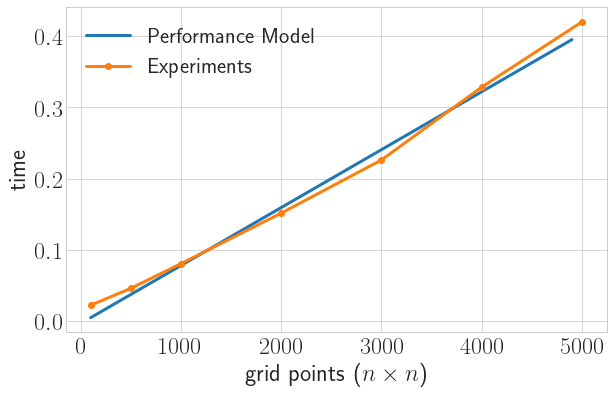

In [71]:
# Change T_1 and T_exp_1 to plot a different number of iterations
f = plt.figure()

line1, = plt.plot(range(100,5000,100),T_1000, label="Performance Model")
line2, = plt.plot(x_exp, T_exp_1000, 'o-', label="Experiments")

plt.legend(handles=[line1, line2], loc=2)
plt.ylabel('time')
plt.xlabel(r'grid points ($n \times n$)')

f.savefig("performance_dimension.pdf", bbox_inches='tight')

In [78]:
x_np_exp = np.array([4, 9, 16, 25])
T_np_exp = np.array([402.679, 417.754, 418.599, 425.894])/1000

num_halo = 8*( (halo[0]+halo[1]+halo[2]+halo[3])*5000 )
T_np = latency + 1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)

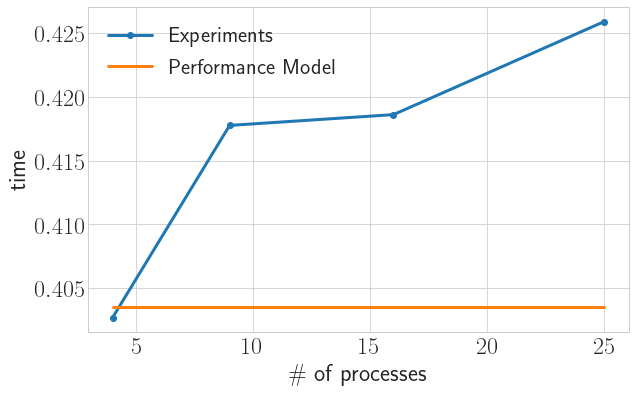

In [79]:
f = plt.figure()

line1, = plt.plot(x_np_exp, T_np_exp, 'o-', label="Experiments")
line2, = plt.plot(x_np_exp, [T_np, T_np, T_np, T_np], label="Performance Model")

plt.legend(handles=[line1, line2], loc=2)
plt.ylabel('time')
plt.xlabel('\# of processes')

f.savefig("performance_processes.pdf", bbox_inches='tight')